# SOK-1006 Mikro
## Seminar 5
### Oppgave 2

In [1]:


import statsmodels as sm
import pandas as pd
import statsmodels.formula.api as smf

df=pd.read_csv("https://uit-sok-1006-v22.github.io/seminarer/data_sem_5.csv", delimiter=',')



/azhome/dcl000@ad.uit.no/.local/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
mod = smf.ols(formula='lnx ~ lnN + lnK', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    lnx   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     151.4
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           1.49e-30
Time:                        15:15:46   Log-Likelihood:                -119.70
No. Observations:                 100   AIC:                             245.4
Df Residuals:                      97   BIC:                             253.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2645      0.310     -0.853      0.3

In [3]:
res.params

Intercept   -0.264466
lnN          1.310710
lnK          0.666391
dtype: float64

Da er `res.params[0]`=lnZ, `res.params[1]`=a, `res.params[2]`=b. Dette kan vi bruke i vår analyse. Vi har sett mange ganger før at likning (2) kan skrives som $x=ZN^aK^b$. Vi kan anvende a og b direkte fra vår estimering, men vi må gjøre om `res.params[0]`fra lnZ til Z, dvs $Z=e^{res.params[0]}$.

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [5]:
x,p,w,r,Z,N,K=sp.symbols('x p w r Z N K', positive=True, real=True)

### deloppgave a)

In [6]:
# begrenser antall desimalplasser til 2 på parametrene
z=np.round(np.exp(res.params[0]),2)
a=np.round(res.params[1],2)
b=np.round(res.params[2],2)
z, a, b

(0.77, 1.31, 0.67)

In [7]:
def prod(N,K):
    return 0.77*N**1.31*K**0.67
prod(N,K)

0.77*K**0.67*N**1.31

In [8]:
# skalaegenskaper er gitt ved om
a+b
# er større enn 1 eller ikke.

1.98

Da har vi en produktfunksjon med stigende skalautbytte.

### deloppgave b)

In [9]:
def profitt(p,N,K,w,r):
    return p*prod(N,K)-w*N-r*K
profitt(p,N,K,w,r)

0.77*K**0.67*N**1.31*p - K*r - N*w

In [10]:
# finn etterspørsel etter arbeidskraft
dpi_N=sp.diff(profitt(p,N,K,w,r),N)
dpi_N

1.0087*K**0.67*N**0.31*p - w

Python ville ikke løse dette.... så vi gjør et forsøk selv.    
$1.0087K^{0.67}N^{0.31}p=w$ og da er $N^{0.31}=\frac{1}{1.0087}\frac{w}{p}\frac{1}{K^{0.67}}$ og videre $(N^{0.31})^{\frac{1}{0.31}}=(\frac{1}{1.0087}\frac{w}{p}\frac{1}{K^{0.67}})^{\frac{1}{0.31}}$.   
Da kan vi skrive: $N=0.97(\frac{w}{p})^{3.23}\frac{1}{K^{2.16}}$.

In [11]:
def ettersp_N(p,K,w):
    return 0.97*(w/p)**3.23*K**(-2.16)
ettersp_N(p,K,w)

0.97*w**3.23/(K**2.16*p**3.23)

Dette må vi tegne. Gitt at K og p er faste tall, la oss bare sette inn K=1 og p=10 (fra oppgave c).

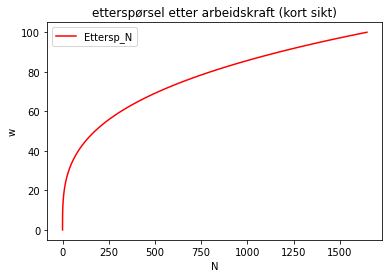

In [14]:
w_num=np.linspace(0.01,100,100)

# eksempel med K=1, p=10

fig,ax=plt.subplots()
 
ax.set_ylabel('w')
ax.set_xlabel('N')
ax.plot(ettersp_N(10,1,w_num), w_num,label='Ettersp_N', color='red')

             
    
#ax.set_ylim([70, 90])
#ax.set_xlim([220,280])

ax.legend(loc='upper left')
ax.set_title('etterspørsel etter arbeidskraft (kort sikt)')

plt.show()

### deloppgave c)    
Men burde ikke etterspørsel helle nedover? Her står det at bedriften bør ansette flere enheter arbeidskraft når lønna økes.

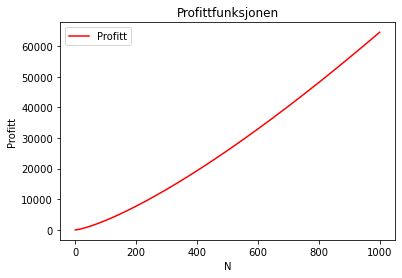

In [16]:
# plotte profittfunksjonen
# eksempel med K=1, p=10, w=1, r=1
N_num=np.linspace(0.01,1000,1000)

fig,ax=plt.subplots()
 
ax.set_ylabel('Profitt')
ax.set_xlabel('N')
ax.plot(N_num, profitt(10,N_num,1,1,1),label='Profitt', color='red')

             
    
#ax.set_ylim([70, 90])
#ax.set_xlim([220,280])

ax.legend(loc='upper left')
ax.set_title('Profittfunksjonen')

plt.show()

In [17]:
# sjekk andreordens betingelse for et maksimum på kort sikt.
aob=sp.diff(dpi_N,N)
aob

0.312697*K**0.67*p/N**0.69

Dette uttrykket består av kun positive tall og dvs at $\frac{\partial^2{profitt}}{\partial N^2}>0$. Profittfunksjonen på kort sikt er en konveks, økende funksjon av N (se på figuren). Dermed er det ingen løsning på maksimeringsproblemet.    
Vi har en teknologi med økende skalautbytte. Dobler vi antall arbeidere, får vi mer en dobbelt produsert mengde. Vi vil øke og øke og øke produksjonen.

### deloppgave d)   
Dersom produksjonsplanen begrenser produsert mengde kan dette løse problemet. For hver måned kan man sette et mål for produsert mengde, og velge antall arbeidere som minimerer kostnaden ved å produsere denne mengden. Da maksimerer man samtidig profitt for denne planlagt produserte mengden.

### deloppgave e)    
Spørsmålet er om maksimeringsproblemet har en løsning på lang sikt med denne produktfunksjonen, ellert om den samme logikken gjelder som på kort sikt. Da bør man sjekke de andreordens betingelser for et maksimum. Har man en funksjon av to variabler $f(x,z)$ så vil den ha et maksimum dersom $(i) \frac{\partial^2 f}{\partial x^2}<0, (ii) \frac{\partial^2 f}{\partial z^2}<0, (iii) \frac{\partial^2 f}{\partial x^2} \frac{\partial^2 f}{\partial z^2}-(\frac{\partial^2 f}{\partial x \partial z})^2>0$ målt ved maksimumspunktet.     
Vi vet allerede at (i) svikter og da har vi ikke med et maksimum å gjøre. Logikken er det samme som ovenfor. Stigende skalautbytte gjør at bedriften er fristet til å øke produksjon i det uendelige.